In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import requests
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
#Below is an example of webscraping. Though for the purpose of this project, I have imported the csv file in the next step.
#import requests
#from bs4 import BeautifulSoup
#from pprint import pprint

#url = 'https://en.wikipedia.org/wiki/Portal:Current_events'
#data = requests.get(url)

#html = BeautifulSoup(data.text, 'html.parser')
#results = html.find(id="bodyContent")
#print(results.prettify())

In [12]:
#Importing csv file
titanic=pd.read_csv("Titanic-Dataset.csv")

Analysing Data

In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
titanic.describe()
# The below shows that only 38% of the total passengers survived
# 52% of people had siblings or spouses travelling along.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.0,0.904602
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.0,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.0,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.0,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0,10.000000


In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#checking Missing/Null Values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#Replacing Null values in Age with median so as to have data completeness
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked']=titanic['Embarked'].fillna(method='backfill')
titanic.shape

(891, 12)

In [19]:
#Dropping cabin column since 687 records are blank and moreover it's not a very useful column for our analysis
titanic=titanic.drop('Cabin',axis=1)
titanic.shape

(891, 11)

In [20]:
#Checking if there are still any missing values remaining
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
#Custom function to derive title from the names.
def get_title(name):
    """
    Use a regular expression to search for a title.  Titles always consist of
    capital and lowercase letters, and end with a period.
    
    Takes a name as input and returns the title string as output
    """

    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

titanic["Title"] = titanic["Name"].apply(get_title)

Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                        }

def titlemap(x):
    return Title_Dictionary[x]


titanic["Title"] = titanic["Title"].apply(titlemap)
print(titanic["Title"])

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object


In [23]:
#converting title into numeric values
def isCommon(title):
    if title == "Mr" or title == "Mrs" or title == "Master" or title == "Miss":
        return 0
    return 1

titanic["Title"] = titanic["Title"].apply(isCommon)

In [24]:
#Combining Siblings, Spouses, Parents or children onboard to a single Family variable
titanic["Family"] = titanic["Parch"] + titanic["SibSp"]

In [51]:
#converting Sex into numeric values
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0    #set male to 0 and female to 1
titanic.loc[titanic["Sex"] == "female", "Sex"] =1

In [26]:
X=titanic[["Pclass","Title","Family","Sex","Age"]].values
y=titanic["Survived"].values
print(X.shape,y.shape)

(891, 5) (891,)


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(knn.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7430167597765364
[[96  9]
 [37 37]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       105
           1       0.80      0.50      0.62        74

    accuracy                           0.74       179
   macro avg       0.76      0.71      0.71       179
weighted avg       0.76      0.74      0.73       179



In [30]:
#Scaling the model is required for features to be on a similar scale since features on a larger scale can disproportionately influence the model.

scaler=StandardScaler()
steps=[('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=6))]
pipeline=Pipeline(steps)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
knn_scaled=pipeline.fit(X_train,y_train)
y_pred=knn_scaled.predict(X_test)
print(knn_scaled.score(X_test,y_test))
print(np.mean(X),np.std(X))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8044692737430168
6.785447811447811 12.743722902629067
[[97  8]
 [27 47]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       105
           1       0.85      0.64      0.73        74

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [53]:
#Used the Gradient Boosting Classifier to improve the accuracy of the model.

clf_gbm=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=500)
clf_gbm.fit(X_train, y_train)
y_pred = clf_gbm.predict(X_test)
print(clf_gbm.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8212290502793296
[[94 11]
 [21 53]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



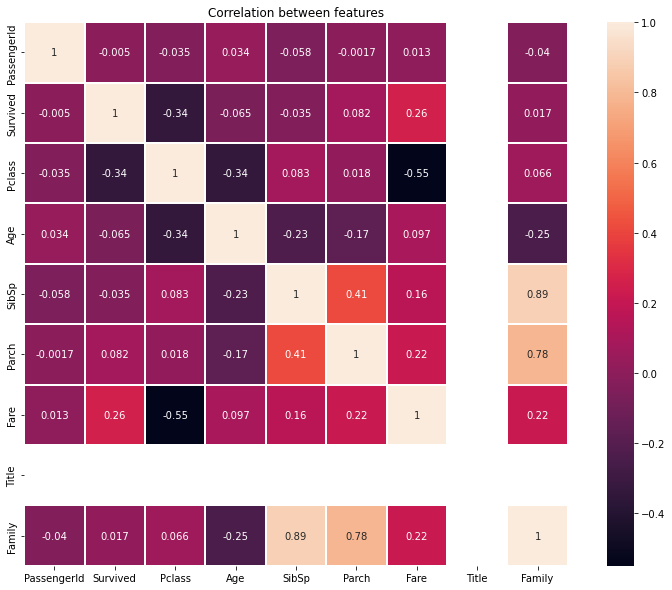

In [34]:
#Data Visualization with Seaborn

corr=titanic.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr,linewidths=0.05,square=True,annot=True,linecolor="white")
plt.title('Correlation between features')
plt.show()

Insights:
- Pclass and Fare are negatively correlated meaning the lower the Pclass, the higher the fare.
- Age and Pclass are also negatively correlated meaning the wealthier people in 1st class were relatively older as compared to those in the other Pclass.

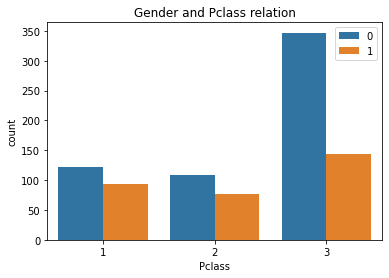

In [40]:
sns.countplot(data=titanic, x="Pclass", hue="Sex")
plt.title("Gender and Pclass relation")
plt.legend()
plt.show()

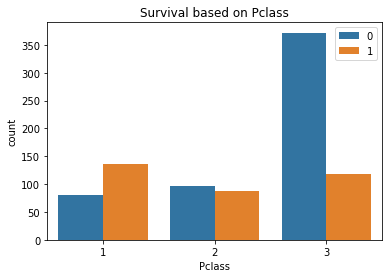

In [41]:
sns.countplot(data=titanic, x="Pclass", hue="Survived")
plt.title("Survival based on Pclass")
plt.legend()
plt.show()

Insight: 
- The above 1st graphs shows that majority of male passengers were travelling in 3rd class and each class had higher number of male members as compared to females.
- We see in the second graph that most deaths were reported from amongst the passengers travelling in 3rd class while it appears that most survivors were from 1st class. 
  This also implies that focus was to save females first.

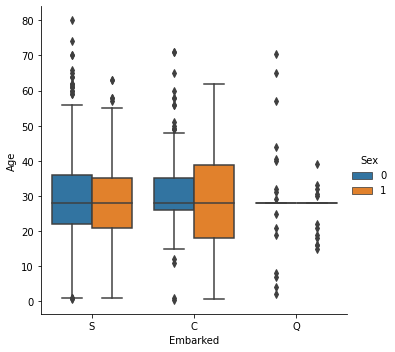

In [48]:
sns.catplot(data=titanic,x='Embarked',y='Age',hue='Sex',kind="box")
plt.show()

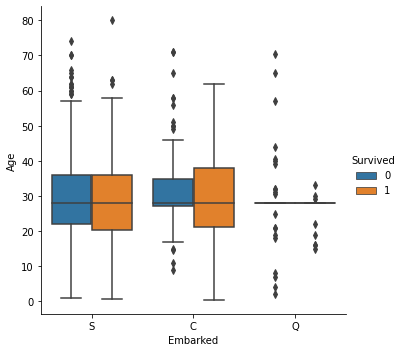

In [49]:
sns.catplot(data=titanic,x='Embarked',y='Age',hue='Survived',kind="box")
plt.show()

Insight:
- Most passengers who embarked at Cherbourg were females and it appears from the 2nd graph above that most of them survived as well. These were in the age-group of 20-40 years.
- More male passengers had embarked at Southampton and is also evident from the bottom graph that most of them died while females were saved.
- Least members had embarked at Queenstown basis the above two graphs.